In [15]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import random

In [16]:
class multi_armed_bandit:
    def __init__(self, k, bandits):
        self.k = k
        self.bandits = bandits
        self.qn = np.zeros((self.bandits, self.k))
        self.true_rewards =  np.zeros((self.bandits, k))
        self.max_arms = np.argmax(self.true_rewards, 1)
        
    def random_walks(self):
        self.true_rewards += np.random.normal(0,0.01,(self.bandits, self.k))
        self.max_arms = np.argmax(self.true_rewards, 1)
        
    def increment_method(self, i, j, R, alpha):
        self.qn[i][j] += alpha*(R - self.qn[i][j])
        
    def sampled_average(self, i, j, all_rewards):
        self.qn[i][j] += np.mean(all_rewards)

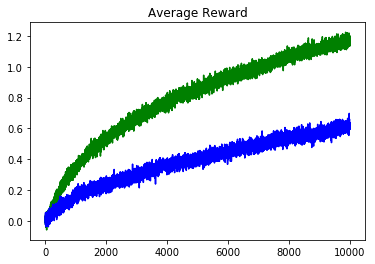

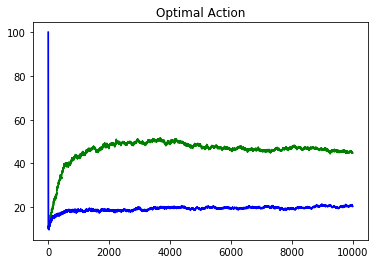

In [18]:
fig1 = plt.figure().add_subplot(111)
fig2 = plt.figure().add_subplot(111)

color = ['g','b','r']

for method in range(2):
    rewards = []
    opt_pulls = []
    testbed = multi_armed_bandit(10,2000)
    epsilon = 0
    n = np.zeros((testbed.bandits, testbed.k))
    all_rewards = [[] for i in range(testbed.bandits)]

    for i in range(10001):
        opt_pull = 0
        temp_rewards = []
        for j in range(testbed.bandits):

            if(random.random() < epsilon):
                p = np.random.randint(testbed.k)
            else:
                p = np.argmax(testbed.qn[j])

            if(p == testbed.max_arms[j]):
                opt_pull+=1

            curr_reward = np.random.normal(testbed.true_rewards[j][p], 1)
            temp_rewards.append(curr_reward)

            n[j][p]+=1
            
            if(method == 0):
                alpha = 0.1
                testbed.increment_method(j, p, curr_reward, alpha)
            elif(method == 1):
                alpha = 1/n[j][p]
                testbed.increment_method(j, p, curr_reward, alpha)

        testbed.random_walks()

        avg_reward = np.mean(temp_rewards)
        rewards.append(avg_reward)
        opt_pulls.append(float(opt_pull)/20)

    fig1.plot(range(10001), rewards, color[method])
    fig2.plot(range(10001), opt_pulls, color[method])
    
fig1.title.set_text('Average Reward')
fig2.title.set_text('Optimal Action')


In [ ]:
fig1 = plt.figure().add_subplot(111)
fig2 = plt.figure().add_subplot(111)

color = ['g','b','r']

for method in range(2):
    rewards = []
    opt_pulls = []
    testbed = multi_armed_bandit(10,2000)
    epsilon = 0
    n = np.zeros((testbed.bandits, testbed.k))
    all_rewards = [[] for i in range(testbed.bandits)]

    for i in range(10001):
        opt_pull = 0
        temp_rewards = []
        for j in range(testbed.bandits):

            if(random.random() < epsilon):
                p = np.random.randint(testbed.k)
            else:
                p = np.argmax(testbed.qn[j])

            if(p == testbed.max_arms[j]):
                opt_pull+=1

            curr_reward = np.random.normal(testbed.true_rewards[j][p], 1)
            temp_rewards.append(curr_reward)

            n[j][p]+=1
            
            if(method == 0):
                alpha = 0.1
                testbed.increment_method(j, p, curr_reward, alpha)
            elif(method == 1):
                alpha = 1/n[j][p]
                testbed.increment_method(j, p, curr_reward, alpha)

        avg_reward = np.mean(temp_rewards)
        rewards.append(avg_reward)
        opt_pulls.append(float(opt_pull)/20)

    fig1.plot(range(10001), rewards, color[method])
    fig2.plot(range(10001), opt_pulls, color[method])
    
fig1.title.set_text('Average Reward')
fig2.title.set_text('Optimal Action')